# PODCAST ANALYSIS - 0 EDA -- 1 VOL & -- 2 FREQ
# 3 # PODCAST EDITING  - (a) HP (b) NR (c) NG

In [14]:
# Global 


# AUDIO MANIPULATION
import sounddevice as sd
import soundfile as sf

# PLAY recording  and Analyze GAIN
from _ms_pod_global_functions import wav_play ,wav_analyze_gain
# Analyze FREQ distribution
from _ms_pod_global_functions import wav_freq_dist_pie_chart, wav_freq_dist_plot,wav_plot_spectrogram

# MIXED plots #PLOT amplitud, lufs, spectogram 
from _ms_pod_global_functions import  wav_plot_3 ,wav_audio_ana_6

# COMPARE DIRECTORY  input for wav files IN ONE FOLDER
from _ms_pod_global_functions import direc_wav_compare_spct

### <<< 0 >>> Audio MANIPULATION

In [15]:
# Query and print all audio devices
sd.query_devices()

# # PLAY AUDIO without being saved
# sd.play(audio_data, RATE, device=2 )
# sd.wait()

# ATTN -> miss fn to get wav 1 channel from any format and client info/tags get info of lenght etc 
# RAW AUDIO input 
direc_wav = "_pod_1_recording"

#file_path = f"{direc_wav}/_0_vr_raw_.wav" # RAW
file_path = f"{direc_wav}/_0_voc_vr.wav"  # w DEMCUS 

#wav_play(file_path)

###  <<< 1 >>> VOLUME ANALYSIS:

In [16]:
#wav_analyze_gain(file_path) # CHECK AMPLITUDE FOR GAIN PURPOSES - ### low GAIN  ### CLIPPING WARNING

###  <<< 2 >>>  FREQUENCY ANALYSIS:

##### 0 to 50 Hz: Purpose: This very low-end range provides the rumble and sub-bass content. --->  < 5% 
##### 50 to 400 Hz: freq of male voices mostly reside here, giving the voice body/fullness.  --->  ~ 40%
##### 400 to 4000 Hz: freq w harmonic content, presence/clarity. vital for intelligibility.  --->  ~ 55%

In [17]:
#wav_freq_dist_pie_chart(file_path) # CHECK FREQ DISTRIUTION
#wav_freq_dist_plot(file_path) # check freq distributions PLOTS
#wav_plot_spectrogram(file_path)

# FURTHER ANALYSIS--------- PLOTS

#wav_plot_3(file_path)
#wav_audio_ana_6(file_path)

# AFTER MODIFyING COMPARE FOLDER ----------- ALL wavs in FOLDER PLOTS
#direc_wav_compare_spct(direc_wav)

# <<< 3 4 5 >>> AUDIO EDITING

In [18]:
# HP functions
from _ms_pod_editing_functions import wav_hp_mod_1
# NR functions
from _ms_pod_editing_functions import wav_nr_mod_1 ,wav_nr_mod_2
# NOISE GATE
from _ms_pod_editing_functions import wav_ng_mod_1, wav_ng_mod_2_pad
# NORMALIZATION 

from _ms_pod_editing_functions import wav_norm_first, wav_comp_norm_lufs

#from _ms_pod_editing_functions import

print(f' EDITING functions working currently in ::: \n*\n*\n*\n*{file_path}\n*\n*\n*\n*')

 EDITING functions working currently in ::: 
*
*
*
*_pod_1_recording/_0_voc_vr.wav
*
*
*
*


### ::: 3a ::: High Pass

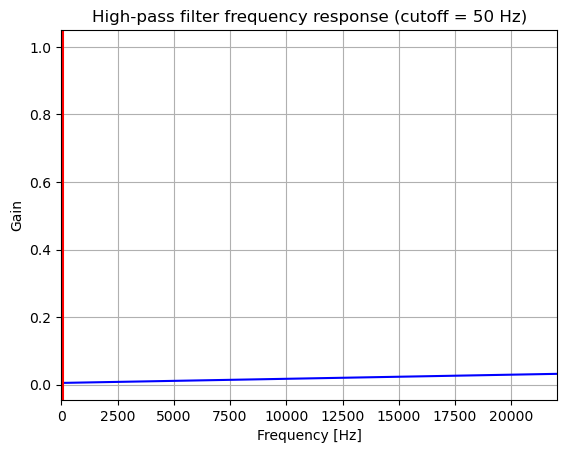

In [19]:
# Usage example
y_hpf, sr = wav_hp_mod_1(file_path, cutoff_frequency=50, order=6)

# Save the high-pass filtered audio
out_file_path_hp_m1 = f"{direc_wav}/_1_vr_raw_iii_HP50"
# Write
sf.write(f'{out_file_path_hp_m1}.wav', y_hpf, sr)

### ::: 3b ::: Noise Reduction (NR) mod_1

In [20]:
# Usage
# Adjust 'audio_path', 'noise_reduction_level', and 'sensitivity' as needed
noise_reduced_output_1 = wav_nr_mod_1(f'{out_file_path_hp_m1}.wav', 0.9, 0.9)

# Save the high-pass filtered audio
out_file_path_nr_m1 = f"{direc_wav}/_2_vr_HP50_iii_NR"
# Write
sf.write(f'{out_file_path_nr_m1}.wav', noise_reduced_output_1, sr)
# Write to a file


##### Noise Reduction (NR) mod_2

In [21]:
# Adjust 'audio_file_path', 'noise_reduction_factor', 'frame_length', and hop_length' as needed
noise_reduced_output_2, sample_rate = wav_nr_mod_2(f'{out_file_path_nr_m1}.wav', 9.8)


# Save the high-pass filtered audio
out_file_path_nr_m2 = f"{direc_wav}/_2b_vr_NR_iii_NR_mod_2"
# Write
sf.write(f'{out_file_path_nr_m2}.wav', noise_reduced_output_2, sample_rate)
# Write to a file


### ::: 3c ::: NOISE GATE - NOT PADDiNG - for low volumes (-80,-60) -- mod_1

In [22]:
#So, 0.01 seconds is equivalent to 10 milliseconds. , attack ~ .01 , release~ .3 (300)

input_file = f'{out_file_path_nr_m2}.wav'

out_file_path_ng_m1 = f"{direc_wav}/_3_vr_NR_mod_2_iii_NG-70_ARdot0105"

# SAVE and EXPORT inside the fn 
wav_ng_mod_1(input_file, f'{out_file_path_ng_m1}.wav', gate_threshold=-63.0, attack=0.29, release=.05)

# <<< 4 >>>   NORMALIZATION and Second NOiSE GATE

#### ::: 4a ::: first Normalization - PEAK NORMALIZATION

In [23]:


# Assume the normalize_audio function is already defined as provided earlier
norm_type = 'peak'  # or 'rms'
# Using the function
input_file_path = f'{out_file_path_ng_m1}.wav' # Replace with your input file path
out_file_path_norm_1 = f"{direc_wav}/_4_vr_NORM_{norm_type}"#{my_level}"

norm_1_audio,sample_rate = wav_norm_first(input_file_path, normalization_type=norm_type, target_level=-0.9)

# Export the normalized audio to a file
sf.write(f"{out_file_path_norm_1}.wav",norm_1_audio, sample_rate)


#### ::: 4b ::: second NG

In [24]:


input_file_path = f'{out_file_path_norm_1}.wav' # Replace with your input file path

out_file_path_norm_ng = f"{direc_wav}/_4b_vr_NORM_{norm_type}_to_NG"#{my_level}"


wav_ng_mod_2_pad(input_file_path, f"{out_file_path_norm_ng}.wav", gate_threshold=-63.0, attack=0.19, release=0.02)


# <<< 5 >>> COMPRESSION and LAST NORMALIZATIONzz

In [25]:
# Usage
input_file = f"{out_file_path_norm_ng}.wav"#{my_level}"

out_comp_norm_lufs = f"{direc_wav}/_5_vr_LUFS_comp_and_norm"

wav_comp_norm_lufs(input_file, f"{out_comp_norm_lufs}.wav", threshold=-0.95, ratio=2.0, attack=0.29, release=0.02, target_lufs=-26.0)


# END

In [ ]:
# further research - DE- ESSER and MULTI BADN COMOPRESSOR 

# NOTES

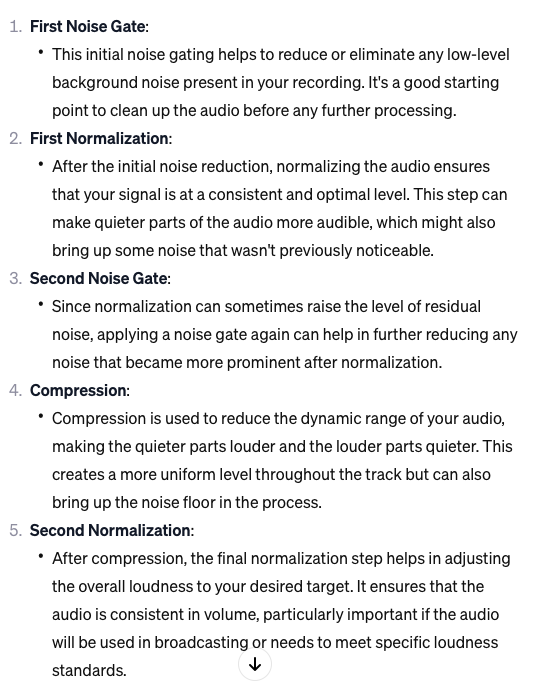

Both steps are crucial for professional audio processing, especially for podcasts and broadcast content. Compression ensures consistent audibility within the track, and LUFS normalization ensures that the overall loudness meets the standards of the intended platform, providing a uniform listening experience. This combination is key to achieving high-quality, platform-compliant audio content.

Adjust the Compression Threshold: Lowering the compression threshold means that more parts of the audio will be subjected to compression